# Lab1

#### Khalid Waleed Alhilal
#### 2230000788
#### 8ma02

### Import Libraries

In [33]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

### Load Dataset

In [34]:
# Load Dataset
# Note: encoding='latin-1' is often needed for this specific dataset
df = pd.read_csv("data/laptops.csv")

# Display first 5 rows
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


### Check Missing Values

In [35]:
# Check all values
print(df.isna())

      Laptop  Status  Brand  Model    CPU    RAM  Storage  Storage type  \
0      False   False  False  False  False  False    False         False   
1      False   False  False  False  False  False    False         False   
2      False   False  False  False  False  False    False         False   
3      False   False  False  False  False  False    False         False   
4      False   False  False  False  False  False    False         False   
...      ...     ...    ...    ...    ...    ...      ...           ...   
2155   False   False  False  False  False  False    False         False   
2156   False   False  False  False  False  False    False         False   
2157   False   False  False  False  False  False    False         False   
2158   False   False  False  False  False  False    False         False   
2159   False   False  False  False  False  False    False         False   

        GPU  Screen  Touch  Final Price  
0      True   False  False        False  
1      True   F

In [36]:
# Count missing values per column
print(df.isna().sum())

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64


### Check Duplicate Rows

In [37]:
# Display rows that are duplicates and checking duplicate rows
#df.duplicated()[df.duplicated()==True]
# Check for duplicates count
duplicates_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

Number of duplicate rows: 0


### Number of Rows and Columns

In [38]:
# Finding number of rows and columns
print("Shape (rows, columns): ", df.shape, "\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (2160, 12) 

number of rows:  2160
number of columns:  12


### Data Types

In [39]:
# Viewing the data types of columns
df.dtypes

Laptop           object
Status           object
Brand            object
Model            object
CPU              object
RAM               int64
Storage           int64
Storage type     object
GPU              object
Screen          float64
Touch            object
Final Price     float64
dtype: object

### Data Cleaning & Type Conversion

In [40]:
# Data is already clean (RAM and Storage are integers)
# Let's just double check the columns
print(df.columns)
df.dtypes

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')


Laptop           object
Status           object
Brand            object
Model            object
CPU              object
RAM               int64
Storage           int64
Storage type     object
GPU              object
Screen          float64
Touch            object
Final Price     float64
dtype: object

### Statistical Summary

In [41]:
# Descriptive summary Statistics
df.describe(include='all')

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
count,2160,2160,2160,2160,2160,2160.000000,2160.000000,2118,789,2156.000000,2160,2160.000000
unique,2160,2,27,121,28,NaN,NaN,2,44,NaN,2,NaN
top,Razer Book FHD+ Intel Evo Core i7-1165G7/16GB/...,New,Asus,15S,Intel Core i7,NaN,NaN,SSD,RTX 3050,NaN,No,NaN
freq,1,1498,415,115,710,NaN,NaN,2062,129,NaN,1933,NaN
mean,NaN,NaN,NaN,NaN,NaN,15.413889,596.294444,NaN,NaN,15.168112,NaN,1312.638509
std,NaN,NaN,NaN,NaN,NaN,9.867815,361.220506,NaN,NaN,1.203329,NaN,911.475417
min,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000,NaN,NaN,10.100000,NaN,201.050000
25%,NaN,NaN,NaN,NaN,NaN,8.000000,256.000000,NaN,NaN,14.000000,NaN,661.082500
50%,NaN,NaN,NaN,NaN,NaN,16.000000,512.000000,NaN,NaN,15.600000,NaN,1031.945000
75%,NaN,NaN,NaN,NaN,NaN,16.000000,1000.000000,NaN,NaN,15.600000,NaN,1708.970000


### Univariate Analysis (Target Variable)

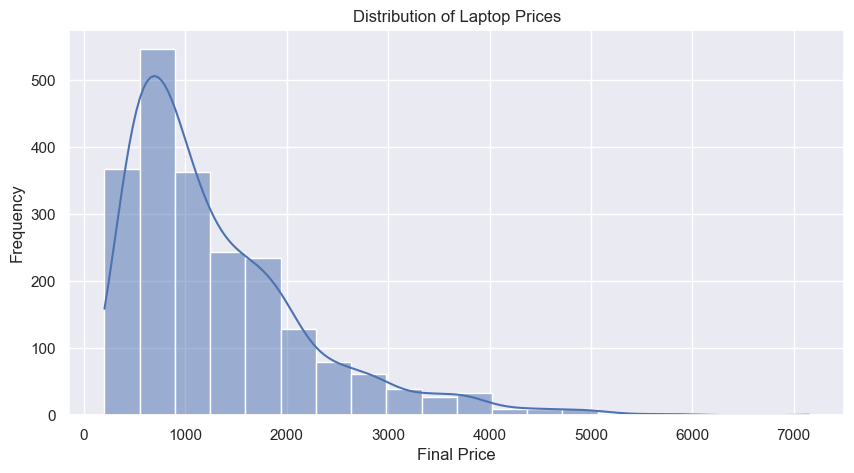

In [42]:
# Visualization 1: Distribution of Final Price
plt.figure(figsize=(10,5))
sns.histplot(df['Final Price'], kde=True, bins=20)
plt.title("Distribution of Laptop Prices")
plt.xlabel("Final Price")
plt.ylabel("Frequency")
plt.show()

### Analysis Comments (Markdown)

### Observations:
- Shows how laptop prices are distributed.
- Right skew indicates most laptops are in the budget/mid-range, with fewer high-end expensive models.

### Bivariate Analysis

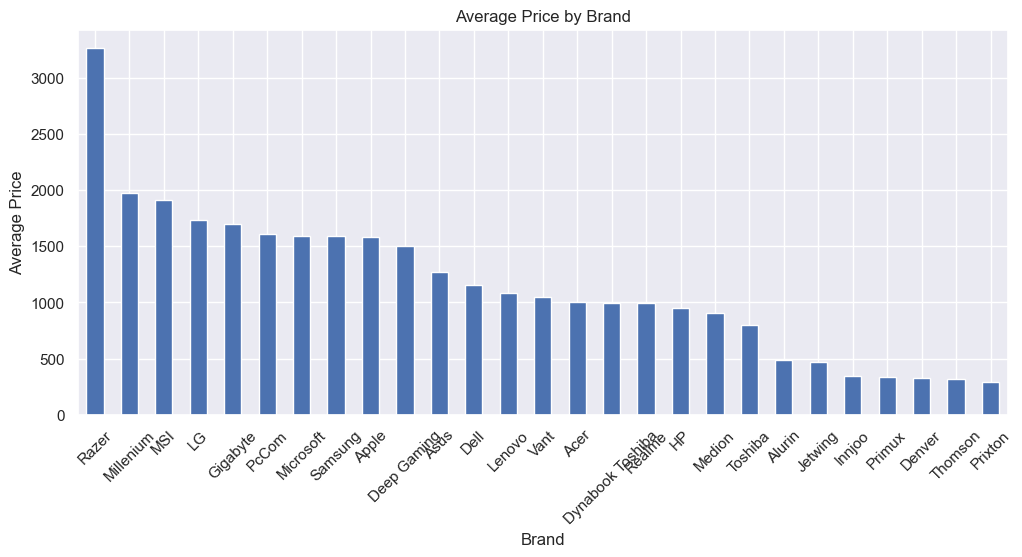

In [43]:
# Average Price by Brand
brand_price = df.groupby('Brand')['Final Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,5))
brand_price.plot(kind='bar')
plt.title("Average Price by Brand")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

### Bivariate Analysis (Categorical vs Numerical 2)

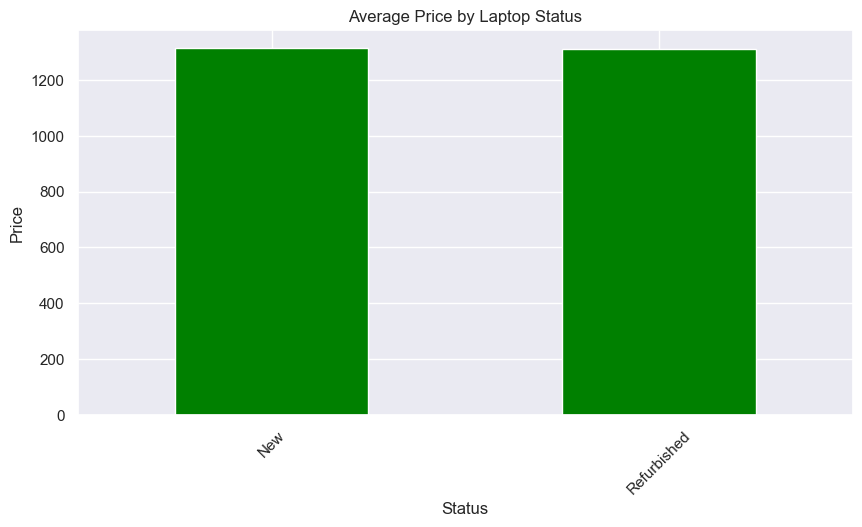

In [44]:
# Average Price by Laptop Status
# Analyzing how the status (e.g., New, Refurbished) affects the price
status_price = df.groupby('Status')['Final Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
status_price.plot(kind='bar', color='green')
plt.title("Average Price by Laptop Status")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

### Bivariate Analysis (Scatter Plot)

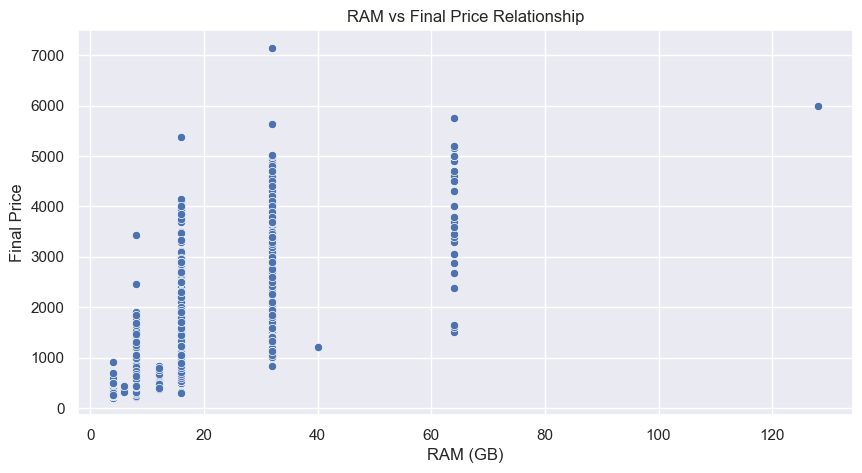

In [45]:
# RAM vs Final Price Relationship
# Checking if higher RAM leads to higher Price
plt.figure(figsize=(10,5))
sns.scatterplot(x='RAM', y='Final Price', data=df)
plt.title("RAM vs Final Price Relationship")
plt.xlabel("RAM (GB)")
plt.ylabel("Final Price")
plt.show()

### Correlation Matrix

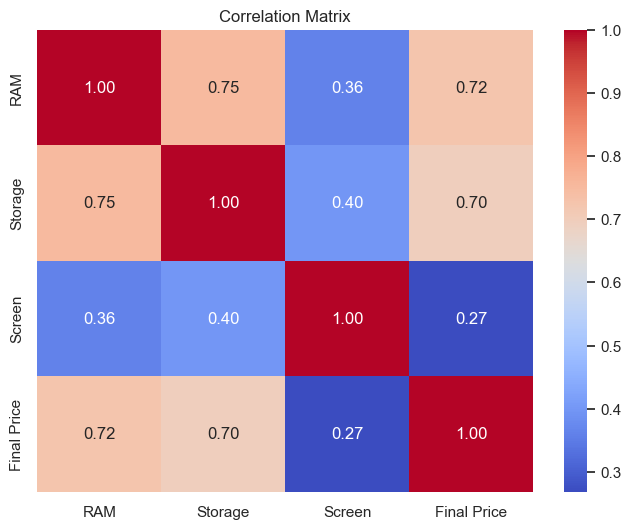

In [46]:
# Correlation Matrix
# Select specific numeric columns: RAM, Storage, Screen, Final Price
numeric_cols = ['RAM', 'Storage', 'Screen', 'Final Price']
corr_df = df[numeric_cols]

plt.figure(figsize=(8,6))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

### Boxplot Analysis

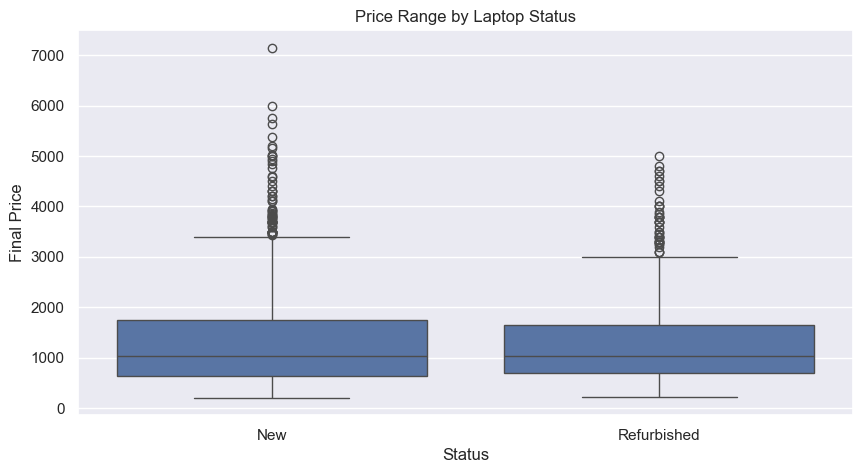

In [47]:
# Price Distribution by Status (Boxplot)
# This helps identify outliers (extremely expensive laptops)
plt.figure(figsize=(10, 5))
sns.boxplot(x='Status', y='Final Price', data=df)
plt.title("Price Range by Laptop Status")
plt.show()

### Market Share Analysis

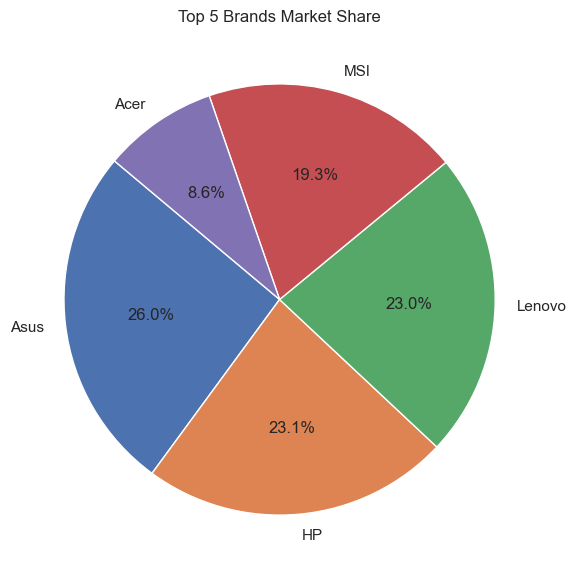

In [48]:
# Top 5 Brands by Number of Laptops (Market Share)
top_brands = df['Brand'].value_counts().head(5)

plt.figure(figsize=(7, 7))
plt.pie(top_brands, labels=top_brands.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Brands Market Share")
plt.show()